In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("output.txt", comment="#", sep=r"\t", header=None, engine='python')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,2.000000e-11,0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-0.000000,0.000000
1,4.000000e-11,10,-0.000449,-0.001741,0.999998,0.999759,-0.000381,-0.001705,0.999998,0.999756,...,0.005314,3.993890e-08,1.441520e-08,0.002663,0.006300,5.210560e-08,2.439170e-08,0.005423,0.004677,0.002243
2,6.000000e-11,20,0.007115,0.000048,0.999975,0.999248,0.007548,0.000231,0.999971,0.999245,...,0.004009,1.794690e-07,7.463850e-08,0.012092,0.004518,2.476640e-07,1.322360e-07,0.013040,0.010932,0.005546
3,8.000000e-11,30,0.018003,0.014082,0.999739,0.998554,0.017370,0.014469,0.999744,0.998548,...,0.004506,3.203870e-06,1.603230e-07,0.008005,0.005450,3.718350e-06,2.818210e-07,0.021603,0.018624,0.008663
4,1.000000e-10,40,0.030487,0.017969,0.999374,0.997645,0.030556,0.018661,0.999359,0.997658,...,0.009775,9.720060e-06,3.235340e-07,0.011421,0.011051,1.142050e-05,5.995970e-07,0.031482,0.026493,0.013582


Inferred from the gnuplot script:

- column 1 is temperature
- column 5 is Ms for Fe
- column 9 is Ms for Ni

<Axes: xlabel='1'>

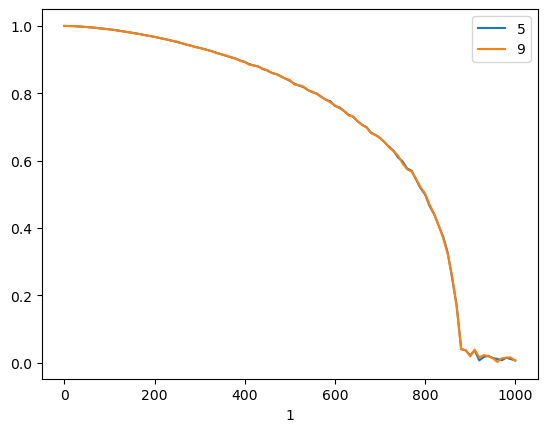

In [3]:
data.plot(x=1, y=[5, 9])

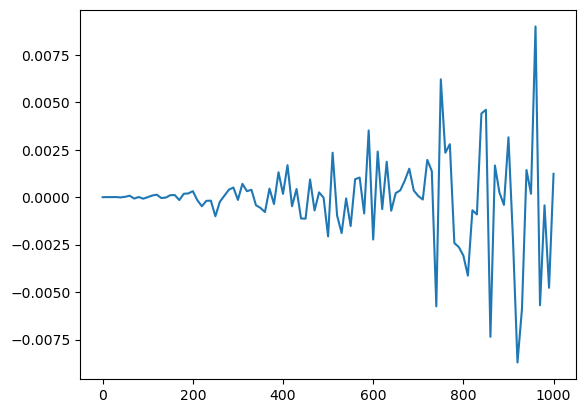

In [4]:
plt.plot(data[1], data[5] - data[9])

Use temperature-dependence for Fe

In [5]:
import mammos_units as u

Magnetic moments from the paper https://arxiv.org/pdf/1908.08885

In [6]:
fu_per_fcc_unit_cell = 4
m_fe = 2.9 * u.mu_B
fraction_fe = 0.2
m_ni = 0.62 * u.mu_B
fraction_ni = 0.8
magnetic_moment = (m_fe * fraction_fe + m_ni * fraction_ni) / u.f_u

vol_per_fu = (3.55 * u.Angstrom) ** 3 / fu_per_fcc_unit_cell

Ms0 = magnetic_moment.to(u.T, equivalencies=u.moment_induction(vol_per_fu)).to("A/m", equivalencies=u.magnetic_flux_field())
Ms0

<Quantity 892184.69121101 A / m>

In [7]:
sel = data[[1, 5]]

In [8]:
sel.loc[:, 5] *= Ms0

In [9]:
# sel.to_csv("M.csv", header=["T[K]", "M[A/m]"], index=False)